In [1]:
import pandas as pd
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
import pickle as p

Scaling and bounding box

In [2]:
meta_data = pd.read_csv('/home/ec2-user/training_data_meta.csv')

In [3]:
image_dict = p.load(open('/home/ec2-user/grayscale_dict.p', 'rb'))

In [4]:
scaled_bounded_image_dict = {
    i[1]['fname'] : 
    np.asarray(
        Image.fromarray(
            image_dict[i[1]['fname']][i[1]['bbox_y1']:i[1]['bbox_y2'],
                                      i[1]['bbox_x1']:i[1]['bbox_x2']
                                     ], 
            mode = 'L'
        ).resize((200,200))
    )
    for i in meta_data.iterrows()}

In [5]:
p.dump(scaled_bounded_image_dict, open('/home/ec2-user/scaled_bounded_grayscale_dict.p', 'wb'))

In [6]:
scaled_bounded_image_dict = p.load(open('/home/ec2-user/scaled_bounded_grayscale_dict.p', 'rb'))

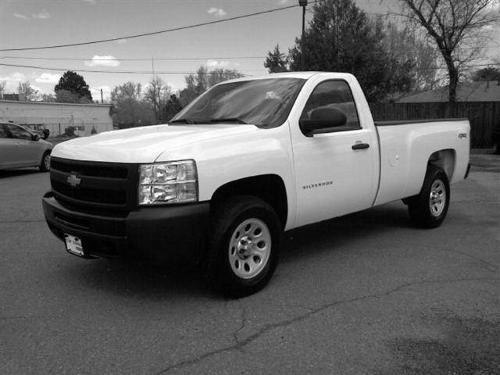

In [11]:
Image.fromarray(image_dict['00264.jpg'], mode = 'L')

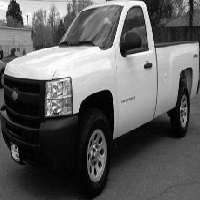

In [12]:
Image.fromarray(scaled_bounded_image_dict['00264.jpg'], mode = 'L')

Simple scaling

In [2]:
image_dict = p.load(open('/home/ec2-user/grayscale_dict.p', 'rb'))

In [3]:
scaled_image_dict = {i : np.asarray(Image.fromarray(image_dict[i], 
                                                    mode = 'L'
                                                   ).resize((25,25))
                                   )
                     for i in image_dict}

In [4]:
p.dump(scaled_image_dict, open('/home/ec2-user/scaled_grayscale_dict.p', 'wb'))

In [5]:
scaled_image_dict = p.load(open('/home/ec2-user/scaled_grayscale_dict.p', 'rb'))

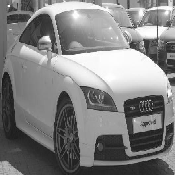

In [22]:
Image.fromarray(scaled_image_dict['03683.jpg'], mode = 'L')

Selecting parameters

In [12]:
image_dict['00001.jpg'].shape

(400, 600)

In [8]:
gray_img = Image.fromarray(image_dict['00001.jpg'], mode = 'L')

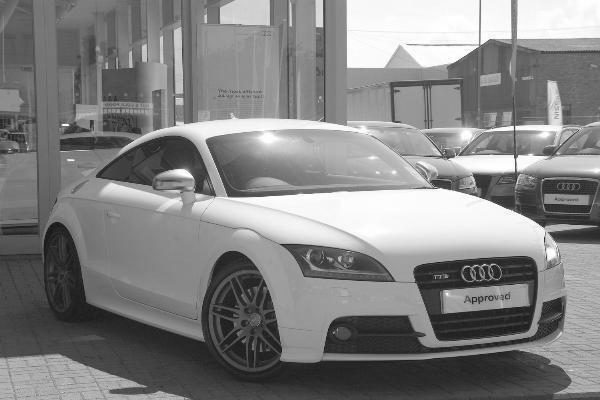

In [9]:
gray_img

In [25]:
scaled = Image.fromarray(block_reduce(image_dict['00001.jpg'], (2, 2), np.max), mode = 'L')

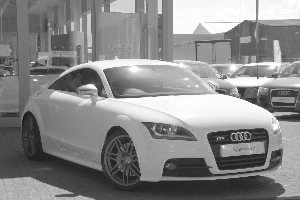

In [26]:
scaled